In [1]:
import tensorflow as tf
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
import os
import random

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def plotImg(imgs, titles = None):
    fig = plt.figure()
    for i in range(len(imgs)):
        ax = fig.add_subplot(1, len(imgs), i + 1)
        if titles != None:
            ax.title.set_text(titles[i])
        plt.imshow(imgs[i])
        plt.axis('off')
    plt.show()

In [3]:
# Set parameters
chkp_dir = 'checkpoints/cnnGesture/'
chkp_name = 'model'
PATH_TO_TEST_IMAGES_DIR = 'data/gesture/test_set'
TEST_IMAGE_PATHS = glob.glob(PATH_TO_TEST_IMAGES_DIR + '/*.png')

In [4]:
# test images collection
test_data = []
test_labels = []
for image_path in TEST_IMAGE_PATHS:
    cls = int(image_path[image_path.rfind('/')+1:image_path.index('-')])
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_data.append(img)
    test_labels.append(cls)
print(np.shape(test_data), np.shape(test_labels))

(369, 300, 370, 3) (369,)


In [5]:
# restore checkpoint
sessRes = tf.Session()
saver = tf.train.import_meta_graph(chkp_dir + 'model.meta')
saver.restore(sessRes, tf.train.latest_checkpoint(chkp_dir))

INFO:tensorflow:Restoring parameters from checkpoints/cnnGesture/model


In [6]:
# restore tensors
img_holder = sessRes.graph.get_tensor_by_name('img_holder:0')
lbl_holder =sessRes.graph.get_tensor_by_name('lbl_holder:0')
train = sessRes.graph.get_tensor_by_name('train_bool:0')
predict = sessRes.graph.get_tensor_by_name('prediction:0')
accuracy = sessRes.graph.get_tensor_by_name('accuracy:0')

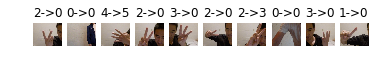

Accuracy: 0.2


In [7]:
# test data prediction
begin = random.randrange(0,254-10)
end = begin+10
test_labels_one_hot = [np.eye(6)[i] for i in test_labels]
res, accuracy_val = sessRes.run([predict, accuracy], feed_dict = {img_holder: test_data[begin:end],
lbl_holder: test_labels_one_hot[begin:end],train: False})
titles = [str(test_labels[begin + i]) + '->' + str(res[i]) for i in range(end - begin)] 
plotImg(test_data[begin:end], titles)
print('Accuracy:', accuracy_val)  

In [8]:
sessRes.close()